In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import librun
from libutil import out_dir
from dotenv import load_dotenv; load_dotenv()
from importlib import reload; import libplot; 
from sklearn import metrics
from tabulate import tabulate
import ipywidgets as widgets
from libplot import align_yaxis
from libdatasets import *
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Fetching

In [1]:
def read_stopping(name):
    file = f"{out_dir()}/stopping2/{name}__none__uncertainty__svm-linear__dataset_size=1000__labelled_size=10__test_size=0.5__n_runs=10__ret_classifiers=True__ensure_y=True__stop_info=True__aggregate=False__stop_function=r__pool_subsample=1000.pickle"
    with open(file, "rb") as f:
        return dill.load(f)

In [7]:
# this is 10 runs on svm-linear, initial set size 10, no data modification
# None indicates a condition failed to stop
datasets = {'webkb', 'spamassassin', 'avila', 'smartphone', 'swarm', 'sensorless', 'splice', 'anuran'}
results = {}
for name in datasets:
    results[name] = read_stopping(name)

In [8]:
criteria = set.union(*[set(list(result.keys())) for result in results.values()])
print(f"Stopping Criteria: {criteria}")

Stopping Criteria: {'VM', 'Contradictory Information', 'FirstDiffMinOverallUncertainty', 'Performance Convergence', 'Overall Uncertainty', 'EVM', 'Stabilizing Predictions', 'SecondDiffZeroPerformanceConvergence', 'FirstDiffZeroOverallUncertainty', 'SSNCut', 'SecondDiffZeroOverallUncertainty', 'FirstDiffZeroStabilizingPredictions-alpha1', 'SC_entropy_mcs', 'GOAL', 'Classification Change', 'SC_oracle_acc', 'FirstDiffZeroPerformanceConvergence', 'Max Confidence', 'Uncertainty Convergence'}


In [9]:
to_plot = {'Overall Uncertainty', 'FirstDiffZeroPerformanceConvergence', 'Performance Convergence', 'Max Confidence', 'VM', 'SecondDiffZeroPerformanceConvergence', 'FirstDiffZeroStabilizingPredictions-alpha1', 'SC_entropy_mcs', 'FirstDiffMinOverallUncertainty', 'GOAL', 'SC_oracle_acc', 'SecondDiffZeroOverallUncertainty', 'EVM', 'SSNCut', 'Stabilizing Predictions', 'Uncertainty Convergence', 'FirstDiffZeroOverallUncertainty', 'Classification Change', 'Contradictory Information'}
results_filter = {dataset: {name: r for name, r in conds.items() if name in to_plot} for dataset, conds in results.items()}

### Evaluate criteria cost 

In [66]:
import libregionplot; reload(libregionplot); from libregionplot import *

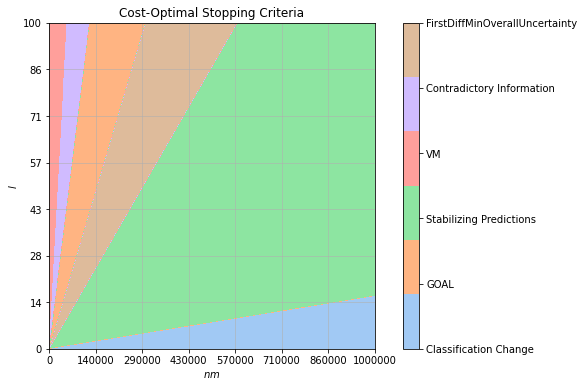

In [67]:
regions(results_filter)

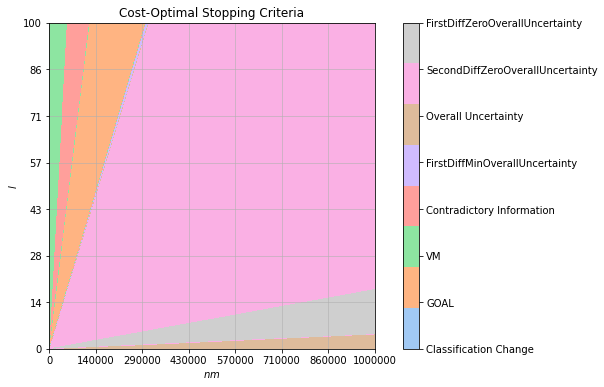

In [43]:
regions(results_filter, failed_to_stop='exclude')

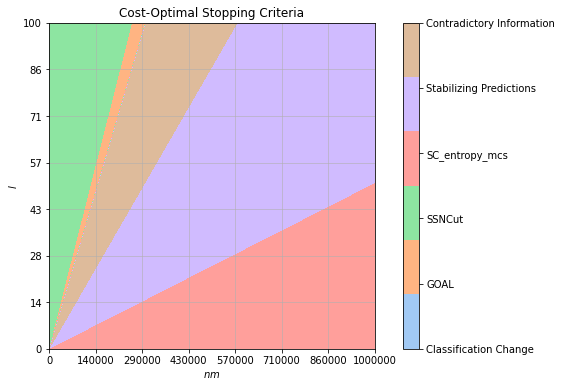

In [44]:
regions(results_filter, failed_to_stop='include')

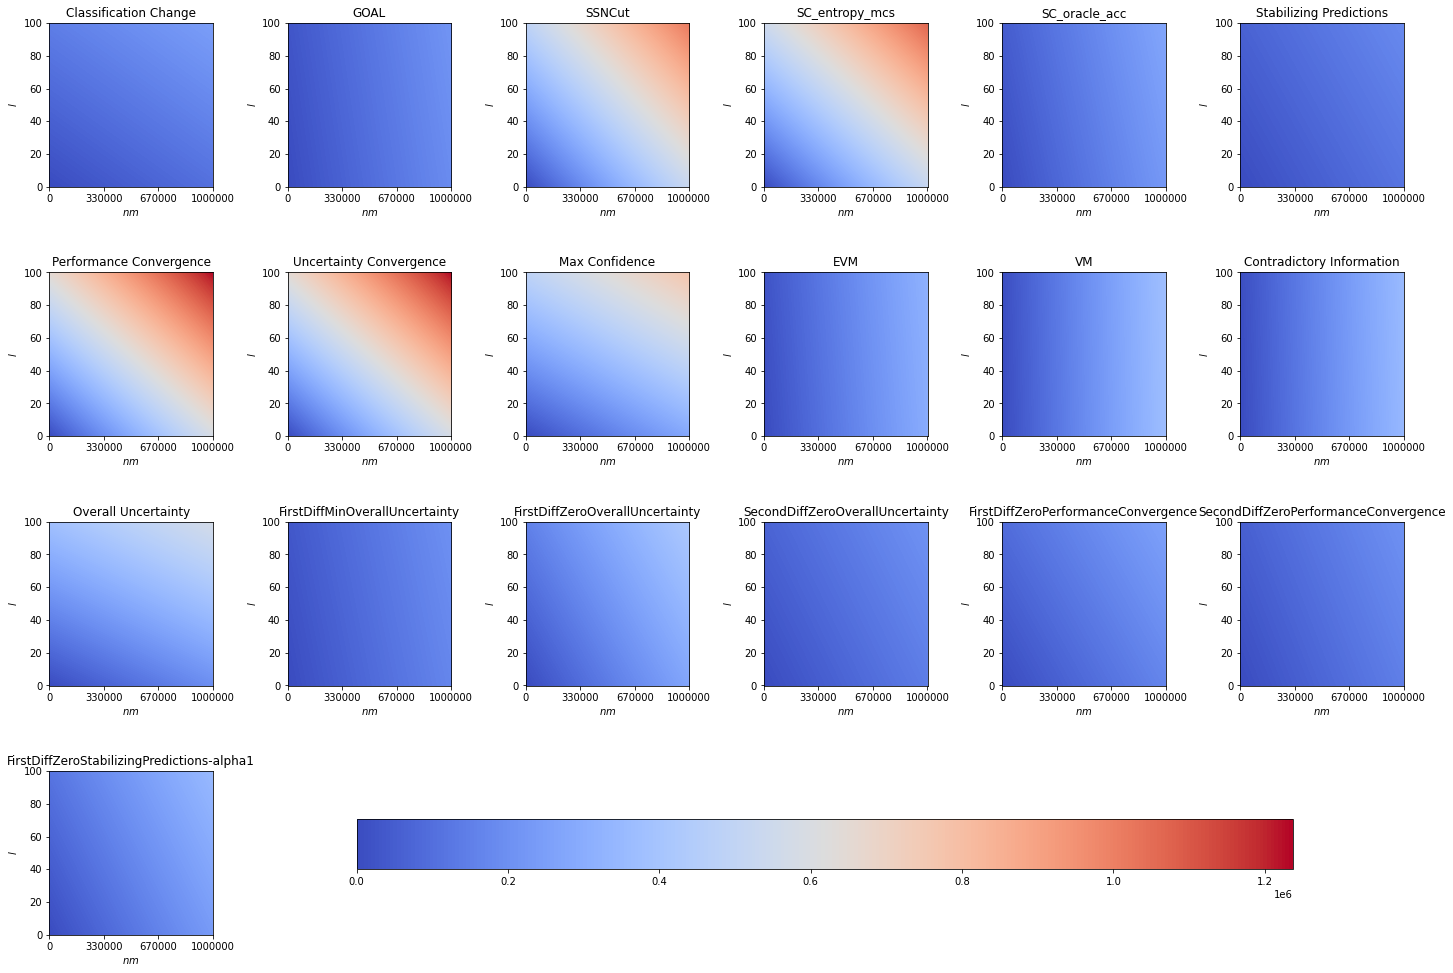

In [59]:
import libregionplot; reload(libregionplot); from libregionplot import *
costs(results_filter)

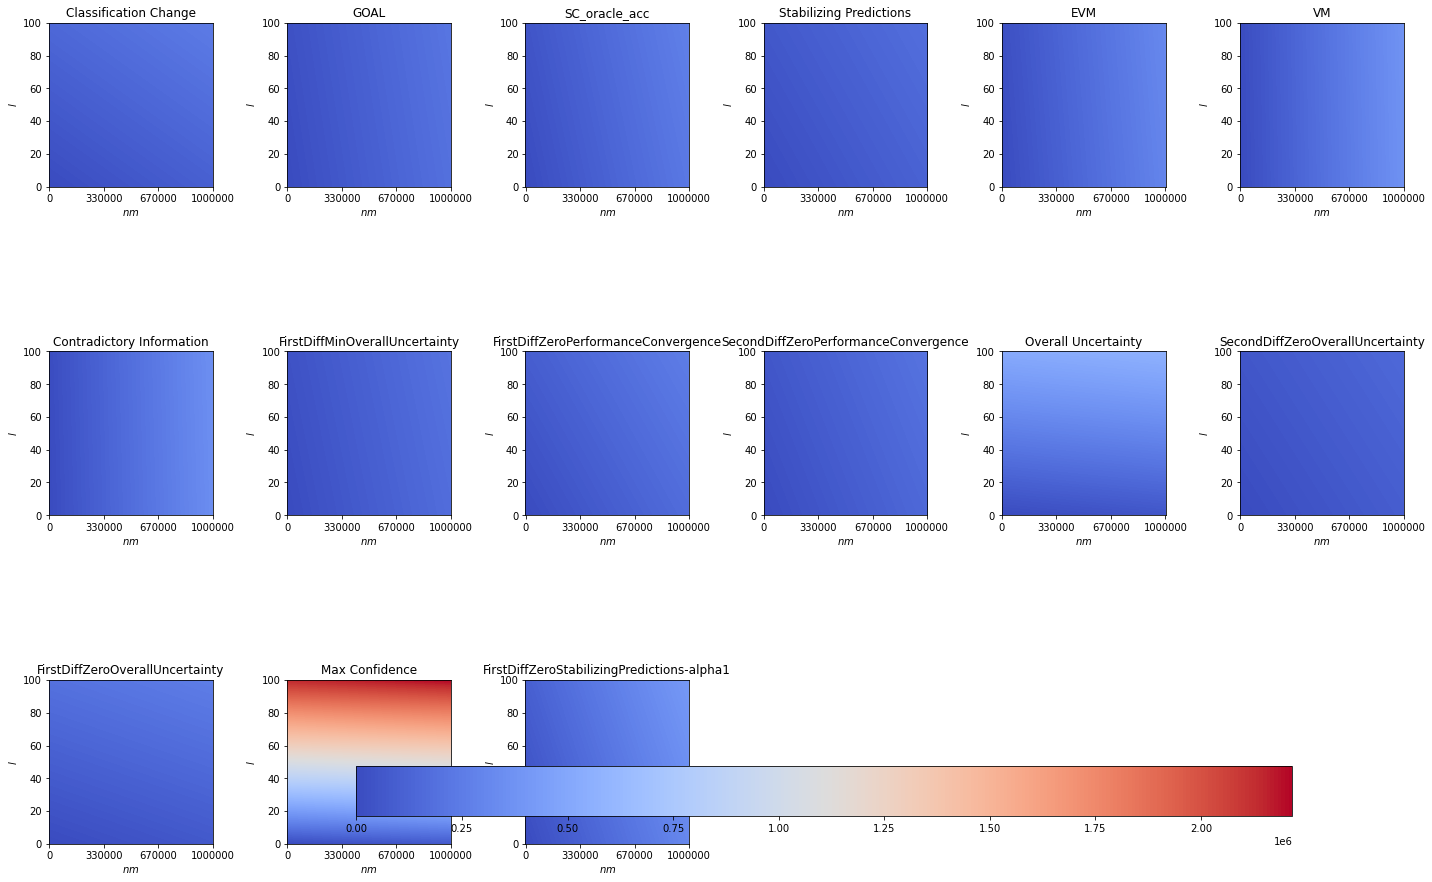

In [69]:
costs(results_filter, failed_to_stop='exclude')

IndexError: index 17 is out of bounds for axis 0 with size 17

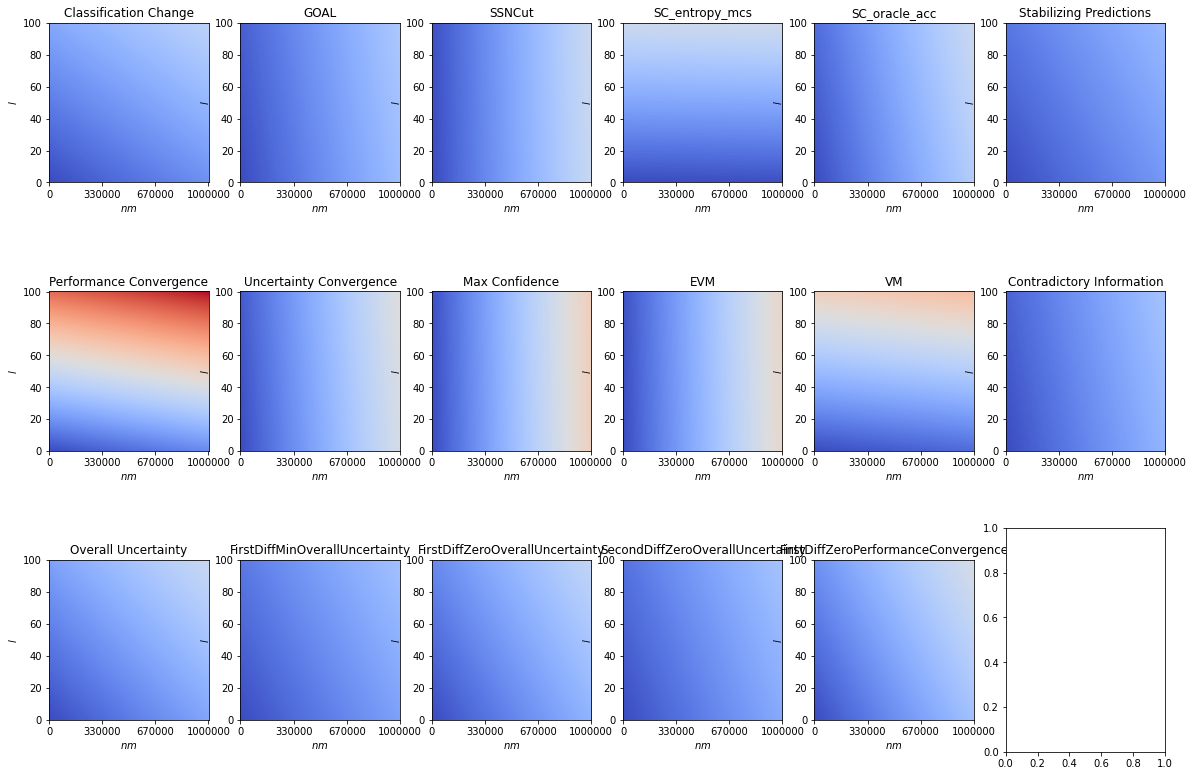

In [70]:
costs(results_filter, failed_to_stop='include')

### Split by dataset:

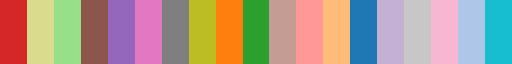

In [75]:
import random
# Seaborn colors
# try husl, hls, gnist_ncar
colors = sns.color_palette('tab20', len(criteria)).as_hex()
random.seed(10); random.shuffle(colors)
criteria_map = {name: color for name, color in zip(criteria, colors)}
cmap = ListedColormap(colors, name='Z'); cmap

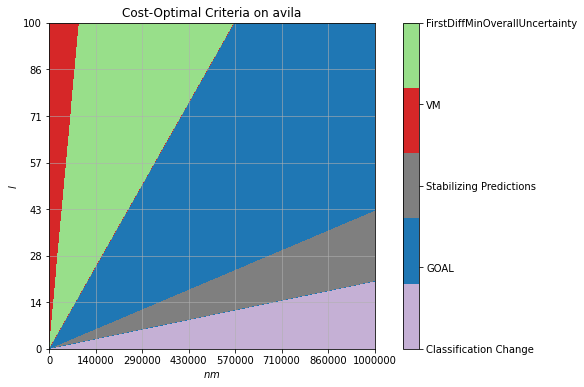

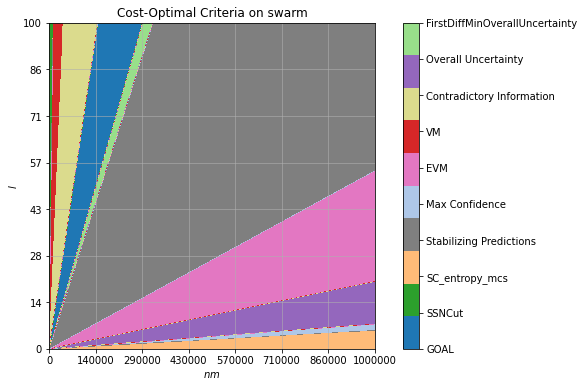

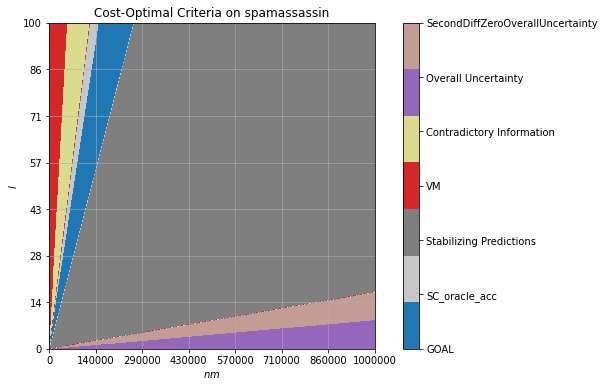

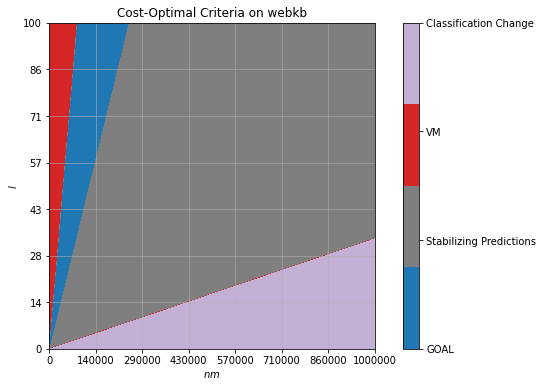

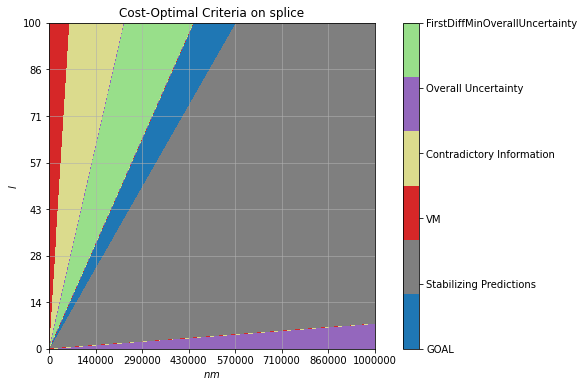

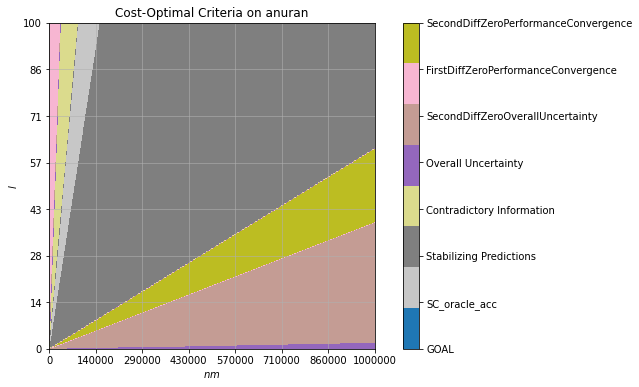

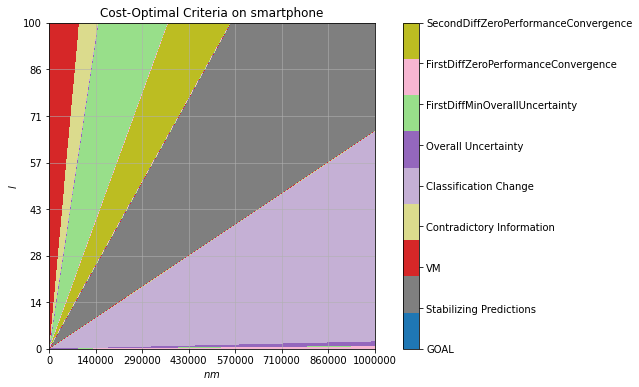

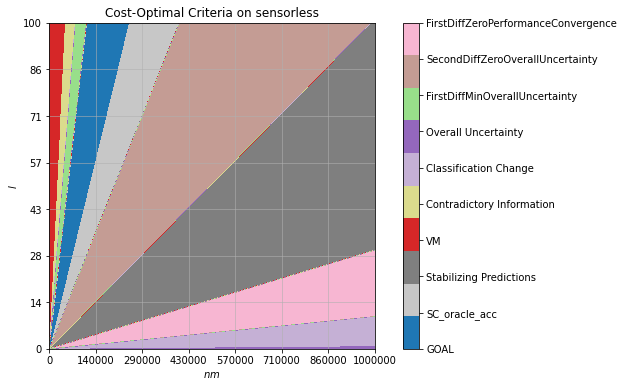

In [77]:
import libregionplot; reload(libregionplot); from libregionplot import *
for name, dataset in results_filter.items():
    regions({name: dataset}, title=f'Cost-Optimal Criteria on {name}', colors=criteria_map)